# Basic Concepts

This tutorial is an introduction to medicinal chemistry molecular filtering. It will show that applying thoes type of filters and rules systematically and blindly is often not a good idea. While powerful such filtering technics must always be carefully assesed and prototyped before using systematically and at large scale.

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import datamol as dm
import pandas as pd

import medchem as mc

## Commercial drugs does not always pass common filters

_NOTE(hadim): show that some drugs pass and some other does not pass the filters. It's important to consider the whole pipeline. At early stage, filters and rules might make sense and during LO and further, small critical modifications will make the drug to fail on certain filters that used to work before_

## General Guidelines

_NOTE(hadim): from Manu "I think there is some ‘guideline’ about the rules in a csv to understand which rules apply to which class of molecules or stage of discovery. It’s mostly heuristic, but could be worth checking properly and highlight to help people getting started."_

## New drugs versus old drugs

_NOTE(hadim): shows new drugs less likely to pass common filters (cite a paper if possible)_

## Case study: pro-drugs

In this example, an example of a pro-drug (Atenovofir for HIV) is shown. _ADD MORE ABOUT THE STORY HERE_

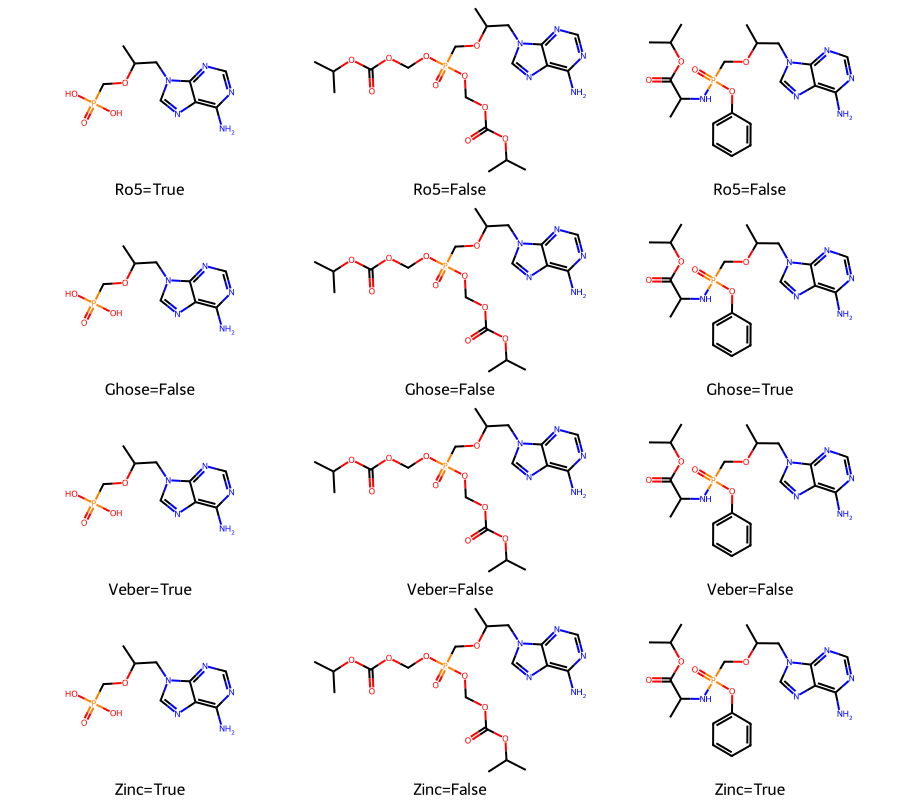

In [3]:
# Build the dataset
smiles_list = [
    "NC1=C2C(N(CC(OCP(O)(O)=O)C)C=N2)=NC=N1",
    "NC1=C2C(N(CC(OCP(OCOC(OC(C)C)=O)(OCOC(OC(C)C)=O)=O)C)C=N2)=NC=N1",
    "NC1=C2C(N(CC(OCP(OC3=CC=CC=C3)(NC(C)C(OC(C)C)=O)=O)C)C=N2)=NC=N1",
]

data = pd.DataFrame({"smiles": smiles_list})
data["mol"] = data["smiles"].apply(dm.to_mol)

# Apply basic rules
data["rule_of_five"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_five)
data["rule_of_ghose"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_ghose)
data["rule_of_veber"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_veber)
data["rule_of_zinc"] = data["smiles"].apply(mc.rules.basic_rules.rule_of_zinc)

# Display the molecules
legends = []
legends += [f"Ro5={v}" for v in data["rule_of_five"]]
legends += [f"Ghose={v}" for v in data["rule_of_ghose"]]
legends += [f"Veber={v}" for v in data["rule_of_veber"]]
legends += [f"Zinc={v}" for v in data["rule_of_zinc"]]

mol_list = data["mol"].tolist() * 4

dm.to_image(mol_list, legends=legends, n_cols=3, mol_size=(300, 200))


_NOTE(hadim): DISCUSS THE RESULTS._